**ANÁLISE EXPLORATÓRIA DA AUTONOMIA ELÉTRICA DE VEÍCULOS COM COMBUSTÍVEL ALTERNATIVO NOS EUA.**

**Este projeto tem como objetivo realizar uma análise exploratória detalhada sobre os veículos movidos a combustíveis alternativos registrados nos Estados Unidos, com foco na variável `All-Electric Range` que representa a autonomia elétrica dos modelos analisados.**

**A partir de um conjunto de dados oficiais, investigamos como diferentes características técnicas e categóricas dos veículos, como tipo de combustível, motorização, transmissão, número de cilindros e categoria (SUV, Sedan, Pickup etc.), influenciam diretamente na autonomia elétrica.**

**Apesar do número reduzido de registros com dados completos para modelagem preditiva, a análise descritiva se mostrou valiosa ao revelar padrões e discrepâncias importantes entre veículos 100% elétricos e híbridos plug-in.**

**O estudo tem aplicação prática para consumidores, fabricantes, formuladores de políticas públicas e entusiastas da mobilidade elétrica, fornecendo insights relevantes sobre a eficiência energética e evolução tecnológica do setor automotivo alternativo.**

**Ao longo do notebook, apresentamos gráficos explicativos e interpretações analíticas para cada métrica estudada, visando construir uma base sólida de compreensão do cenário atual dos veículos elétricos e híbridos nos EUA.**

In [14]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')



In [15]:
# Carregando a base de dados
df = pd.read_csv('/content/Alternative Fuel Vehicles US.csv')

In [16]:
# Observando
df.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [17]:
# Observando a quantidade de linhas e colunas
df.shape

(882, 22)

In [18]:
# Obtendo infirmações sobre os tipos variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [19]:
# Observando a existência de valores nulos
df.isnull().sum()

,0
Category,0
Model,0
Model Year,288
Manufacturer,0
Fuel,0
All-Electric Range,660
PHEV Total Range,839
Alternative Fuel Economy City,713
Alternative Fuel Economy Highway,713
Alternative Fuel Economy Combined,620


In [20]:
# Calculando o percentual de valores ausentes
percentual_nan = (df.isnull().sum() / len(df)) * 100

In [21]:
# Filtrando apenas colunas com pelo menos 1% de valores ausentes e ordena
percentual_nan = percentual_nan[percentual_nan > 0].sort_values(ascending=False)

In [22]:
# Exibindo o resultado formatado
print("Percentual de valores ausentes por coluna:\n")
print(percentual_nan.apply(lambda x: f"{x:.2f}%"))

Percentual de valores ausentes por coluna:

PHEV Total Range                      95.12%
Number of Passengers                  86.28%
Transmission Make                     85.83%
Alternative Fuel Economy City         80.84%
Alternative Fuel Economy Highway      80.84%
Notes                                 79.71%
All-Electric Range                    74.83%
Heavy-Duty Power System               72.22%
Alternative Fuel Economy Combined     70.29%
Drivetrain                            62.70%
Conventional Fuel Economy Highway     49.66%
Conventional Fuel Economy Combined    49.66%
Conventional Fuel Economy City        49.66%
Engine Cylinder Count                 49.09%
Engine Type                           33.22%
Engine Size                           33.22%
Model Year                            32.65%
Transmission Type                     27.44%
dtype: object


In [23]:
# Vamos dropar as colunas que possuem valores ausentes > 70%
# A variável 'All-Electric Range' será mantida, pois será nossa target
cols_to_drop = [
    'PHEV Total Range',
    'Number of Passengers',
    'Transmission Make',
    'Alternative Fuel Economy City',
    'Alternative Fuel Economy Highway',
    'Notes',
    'Heavy-Duty Power System',
    'Alternative Fuel Economy Combined',
    'Model'
]

In [24]:
# Dropando
df_cleaned_full = df.drop(columns=cols_to_drop)

In [25]:
# Observando as modificações
df_cleaned_full.head()

,Category,Model Year,Manufacturer,Fuel,All-Electric Range,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Drivetrain
0,Sedan/Wagon,2022.0,Acura,Hybrid Electric,NaN,21.0,22.0,21.0,Auto,SI,3.5L,6.0,AWD
1,Sedan/Wagon,2022.0,Audi,Hybrid Electric,NaN,29.0,38.0,32.0,Auto,SI,2.0L,4.0,FWD
2,Sedan/Wagon,2022.0,Audi,Hybrid Electric,NaN,28.0,36.0,31.0,Auto,SI,2.0L,4.0,AWD
3,Sedan/Wagon,2022.0,Audi,Hybrid Electric,NaN,24.0,30.0,26.0,Auto,SI,2.0L,4.0,AWD
4,Sedan/Wagon,2022.0,Audi,Hybrid Electric,NaN,26.0,34.0,29.0,Auto,SI,2.0L,4.0,AWD


In [26]:
# Selecionando todas as colunas numéricas, exceto a variável alvo
num_cols = df_cleaned_full.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('All-Electric Range')
imputer_num = SimpleImputer(strategy='median')
df_cleaned_full[num_cols] = imputer_num.fit_transform(df_cleaned_full[num_cols])

In [27]:
# Imputando a  moda nas variáveis categóricas
cat_cols = df_cleaned_full.select_dtypes(include='object').columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_cleaned_full[cat_cols] = imputer_cat.fit_transform(df_cleaned_full[cat_cols])

In [28]:
# Observando se o tratamento foi feito
df_cleaned_full.isnull().sum()

,0
Category,0
Model Year,0
Manufacturer,0
Fuel,0
All-Electric Range,660
Conventional Fuel Economy City,0
Conventional Fuel Economy Highway,0
Conventional Fuel Economy Combined,0
Transmission Type,0
Engine Type,0


In [29]:
# Removando os valores nulos da variável alvo
df_cleaned = df_cleaned_full[df_cleaned_full['All-Electric Range'].notna()].copy()

In [30]:
# Observando se o tratamento foi feito
df_cleaned.isnull().sum()

,0
Category,0
Model Year,0
Manufacturer,0
Fuel,0
All-Electric Range,0
Conventional Fuel Economy City,0
Conventional Fuel Economy Highway,0
Conventional Fuel Economy Combined,0
Transmission Type,0
Engine Type,0


In [31]:
# Observando o shape novamente
df_cleaned.shape

(222, 13)

In [32]:
# Observando valores únicos
for col in df_cleaned.columns:
    print(f"\n Coluna: {col}")
    print(f"Total de valores únicos: {df_cleaned[col].nunique()}")
    print(f"Valores únicos: {df_cleaned[col].unique()[:10]}{'...' if df_cleaned[col].nunique() > 10 else ''}")


 Coluna: Category
Total de valores únicos: 4
Valores únicos: ['Sedan/Wagon' 'SUV' 'Van' 'Pickup']

 Coluna: Model Year
Total de valores únicos: 2
Valores únicos: [2022. 2021.]

 Coluna: Manufacturer
Total de valores únicos: 31
Valores únicos: ['Audi' 'Bentley Motors' 'BMW' 'Chevrolet' 'Chrysler' 'Ferrari' 'Ford'
 'Hyundai' 'Jeep' 'Kia']...

 Coluna: Fuel
Total de valores únicos: 2
Valores únicos: ['Plug-in Hybrid Electric' 'Electric']

 Coluna: All-Electric Range
Total de valores únicos: 110
Valores únicos: [ 26. 238. 222. 208. 181. 218. 212. 185. 241.  23.]...

 Coluna: Conventional Fuel Economy City
Total de valores únicos: 26
Valores únicos: [25. 22. 17. 24. 19. 29. 16. 43. 52. 33.]...

 Coluna: Conventional Fuel Economy Highway
Total de valores únicos: 23
Valores únicos: [31. 28. 27. 22. 33. 30. 29. 26. 19. 20.]...

 Coluna: Conventional Fuel Economy Combined
Total de valores únicos: 26
Valores únicos: [27. 24. 26. 19. 28. 25. 22. 20. 30. 17.]...

 Coluna: Transmission Type
Total 

In [33]:
# Ver frequência dos fabricantes
fabricante_freq = df_cleaned['Manufacturer'].value_counts()

In [34]:
# Definir limite mínimo de frequência para manter fabricante como categoria separada
limiar = 5

In [35]:
# Criar lista de fabricantes menos frequentes
fabricantes_agrupados = fabricante_freq[fabricante_freq < limiar].index

In [36]:
# Aplicar transformação ao df_cleaned
df_cleaned['Manufacturer Grouped'] = df_cleaned['Manufacturer'].apply(
    lambda x: 'Other' if x in fabricantes_agrupados else x)
print(df_cleaned['Manufacturer Grouped'].value_counts())

Manufacturer Grouped
Other              46
Porsche            34
Tesla              24
BMW                24
Ford               20
Volvo              18
Audi               17
Hyundai            10
Volkswagen          9
Kia                 8
Nissan              6
Lucid USA, Inc.     6
Name: count, dtype: int64


In [37]:
# Função para agrupar os tipos de combustível
def agrupar_fuel(valor):
    valor = str(valor).lower()
    if 'electric' in valor and 'plug' not in valor:
        return 'Electric'
    elif 'plug' in valor:
        return 'Plug-in Hybrid'
    elif 'hybrid' in valor:
        return 'Hybrid'
    else:
        return 'Alternative Fuel'


In [38]:
# Aplicando
df_cleaned['Fuel Grouped'] = df_cleaned['Fuel'].apply(agrupar_fuel)
print(df_cleaned['Fuel Grouped'].value_counts())

Fuel Grouped
Electric          129
Plug-in Hybrid     93
Name: count, dtype: int64


In [39]:
# Criando Engine Size Category baseado em Fuel Grouped
def engine_category(row):
    if row['Fuel Grouped'] == 'Electric':
        return 'Electric Motor'
    elif row['Fuel Grouped'] in ['Hybrid', 'Plug-in Hybrid']:
        return 'Hybrid System'
    else:
        return 'Combustion Engine'

In [40]:
df_cleaned['Engine Size Category'] = df_cleaned.apply(engine_category, axis=1)
print(df_cleaned['Engine Size Category'].value_counts())

Engine Size Category
Electric Motor    129
Hybrid System      93
Name: count, dtype: int64


In [41]:
# Observando a frequncia de cada categoria da variável 'Drivetrain'
print(df_cleaned['Drivetrain'].value_counts())

Drivetrain
AWD              180
RWD               17
FWD               16
4WD                5
Part-Time 4WD      4
Name: count, dtype: int64


In [42]:
# Função para agrupar tipos de tração
def agrupar_drivetrain(valor):
    if valor in ['4WD', 'Part-Time 4WD']:
        return '4WD'
    return valor

In [43]:
# Aplicando transformação e observando
df_cleaned['Drivetrain Grouped'] = df_cleaned['Drivetrain'].apply(agrupar_drivetrain)
print(df_cleaned['Drivetrain Grouped'].value_counts())

Drivetrain Grouped
AWD    180
RWD     17
FWD     16
4WD      9
Name: count, dtype: int64


In [44]:
# Removendo a coluna 'Transmission Type porque tem pouca variabilidade
df_cleaned.drop(columns=['Transmission Type'], inplace=True)

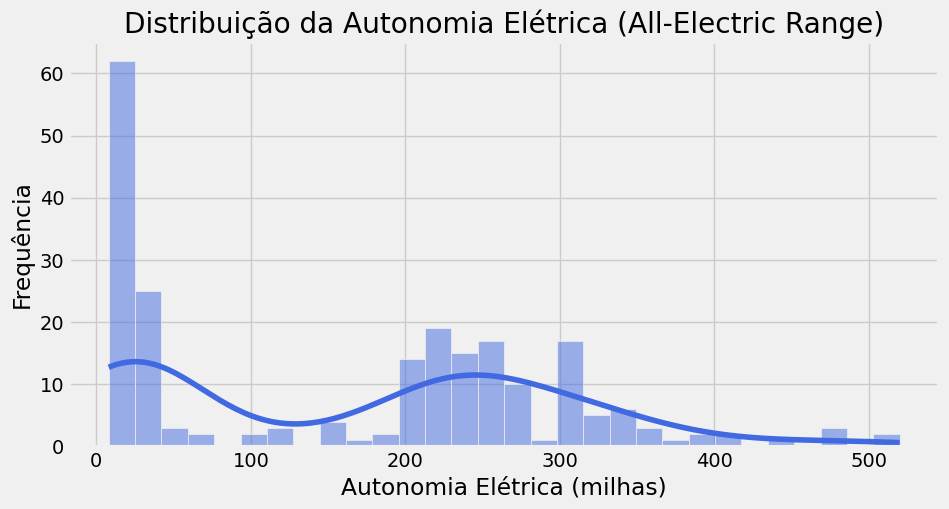

In [45]:
# Observando a variável alvo 'All-Electric Range'
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['All-Electric Range'], kde=True, bins=30, color='royalblue')
plt.title('Distribuição da Autonomia Elétrica (All-Electric Range)')
plt.xlabel('Autonomia Elétrica (milhas)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

**Acima vemos a distribuição da autonomia elétrica mostra uma forte concentração de veículos com autonomia inferior a 50 milhas, sugerindo que muitos modelos ainda operam como híbridos plug-in (PHEVs) com alcance elétrico limitado. Por outro lado, há uma segunda concentração entre 200 e 300 milhas, indicando a presença de modelos 100% elétricos mais avançados.Também temos modelos com mais de 400 milhas de autonomia, provavelmente são modelos de topo. A dispersão acentuada revela a heterogeneidade tecnológica entre os veículos alternativos registrados.**

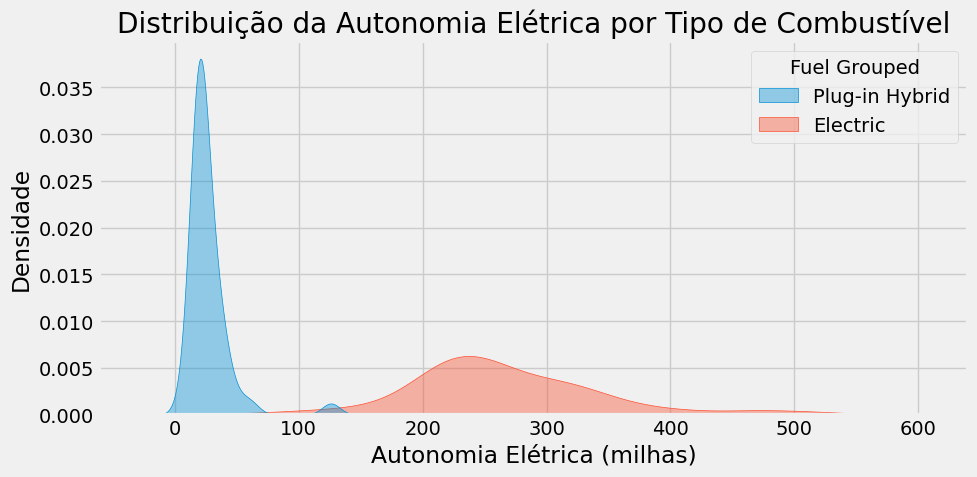

In [46]:
# Gráfico de densidade da autonomia separada por tipo de combustível
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_cleaned[df_cleaned['All-Electric Range'].notna()],
            x='All-Electric Range',
            hue='Fuel Grouped',
            fill=True,
            alpha=0.4,
            common_norm=False)

plt.title('Distribuição da Autonomia Elétrica por Tipo de Combustível')
plt.xlabel('Autonomia Elétrica (milhas)')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

**Neste gráfico validamos o que vimos no anterior, onde os veículos Plug-in Hybrid são os de menor autonomia e os 100% elétricos com uma autonomia muito maior.**

**Plug-in Hybrid** concentram-se fortemente em autonomias abaixo de 50 milhas, pois o motor elétrico é complementar ao motor a combustão.

**100% Elétricos** apresentam uma distribuição mais dispersa e centrada entre 200 e 300 milhas, com alguns modelos de topo chegando a ultrapassar 500 milhas.

**A separação entre os dois grupos é nítida, o que sugere que o tipo de combustível é um forte determinante da autonomia elétrica. Essa visualização é essencial para destacar como a tecnologia e o design de propulsão impactam diretamente no alcance elétrico dos veículos**.



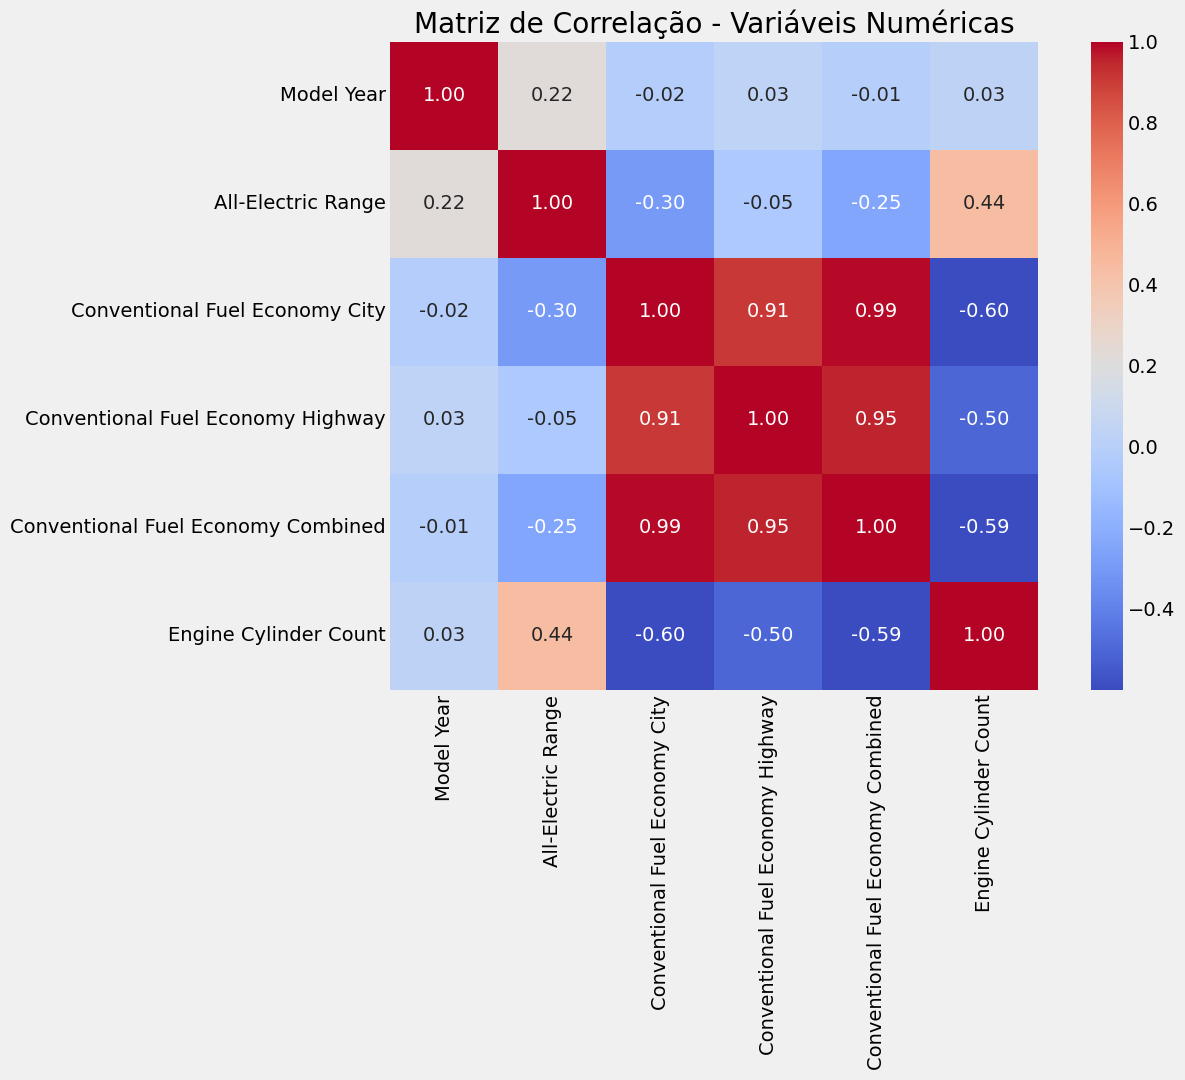

In [47]:
# Matriz de correlação apenas para variáveis numéricas
plt.figure(figsize=(12, 8))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

**Na matriz acima percebemos uma alta correlação entre as variáveis 'Fuel Economy City', 'Fuel Economy Highway' e 'Fuel Economy Combined', 2 delas serão excluídas para não atrapalhar o modelo com multicolinearidade, pois a mesma dificulta a obtenção de estimativas confiáveis e interpretáveis do impacto de cada variável preditora no modelo.**

In [48]:
# Excluindo as variáveis 'Conventional Fuel Economy City' e 'Conventional Fuel Economy Highway'
df_cleaned.drop(columns=['Conventional Fuel Economy City', 'Conventional Fuel Economy Highway'], inplace=True)

In [49]:
# Observando
df_cleaned.head()

,Category,Model Year,Manufacturer,Fuel,All-Electric Range,Conventional Fuel Economy Combined,Engine Type,Engine Size,Engine Cylinder Count,Drivetrain,Manufacturer Grouped,Fuel Grouped,Engine Size Category,Drivetrain Grouped
14,Sedan/Wagon,2022.0,Audi,Plug-in Hybrid Electric,26.0,27.0,SI,2.0L,4.0,AWD,Audi,Plug-in Hybrid,Hybrid System,AWD
16,Sedan/Wagon,2022.0,Audi,Electric,238.0,24.0,e-motor,175 kW electric motor,6.0,AWD,Audi,Electric,Electric Motor,AWD
17,SUV,2022.0,Audi,Electric,222.0,24.0,e-motor,141 kW and 172 kW electric motor,6.0,AWD,Audi,Electric,Electric Motor,AWD
18,SUV,2022.0,Audi,Electric,208.0,24.0,e-motor,138kW electric motor,6.0,AWD,Audi,Electric,Electric Motor,AWD
19,SUV,2022.0,Audi,Electric,181.0,24.0,e-motor,138kW electric motor,6.0,AWD,Audi,Electric,Electric Motor,AWD


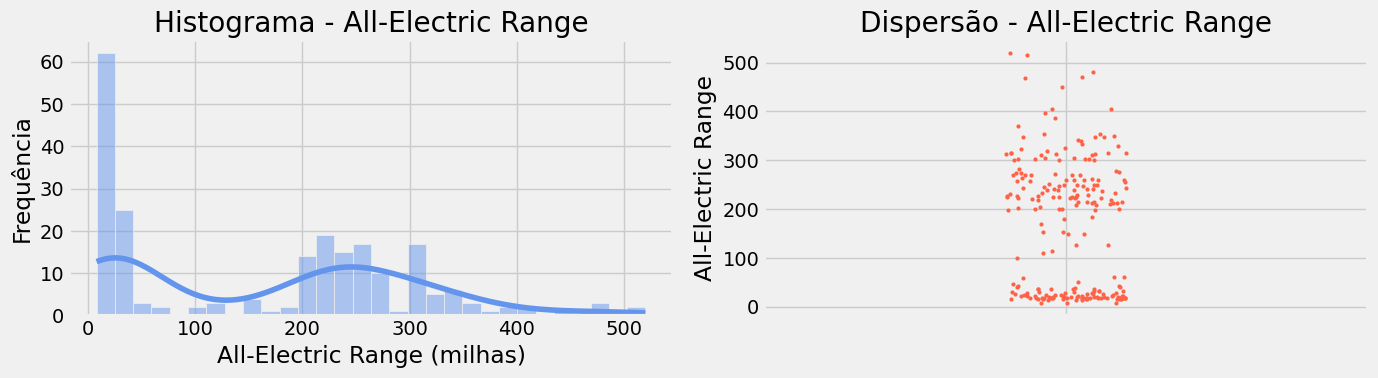

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df_cleaned['All-Electric Range'], ax=axes[0], bins=30, kde=True, color='cornflowerblue')
axes[0].set_title('Histograma - All-Electric Range')
axes[0].set_xlabel('All-Electric Range (milhas)')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)
sns.stripplot(y=df_cleaned['All-Electric Range'], ax=axes[1], color='tomato', size=3)
axes[1].set_title('Dispersão - All-Electric Range')
axes[1].set_ylabel('All-Electric Range')
axes[1].grid(True)
plt.tight_layout()
plt.show()

**A visualização acima combina duas abordagens para entender melhor a variável `All-Electric Range`:**

**Histograma com KDE (à esquerda):** Evidencia dois picos distintos, um entre 0 e 50 milhas (PHEVs) e outro entre 200 e 300 milhas (veículos elétricos puros). A curva suavizada (KDE) destaca a bimodalidade da distribuição.

**Gráfico de dispersão (à direita):** Reforça a existência de dois agrupamentos verticais bem definidos,, mostra que poucos veículos ultrapassam a marca de 400 milhas de autonomia. A disposição vertical permite observar facilmente a concentração de pontos nas faixas críticas.

**Essas visualizações reforçam a heterogeneidade da frota e mostram como ainda há uma grande quantidade de veículos com baixa autonomia elétrica no mercado.**


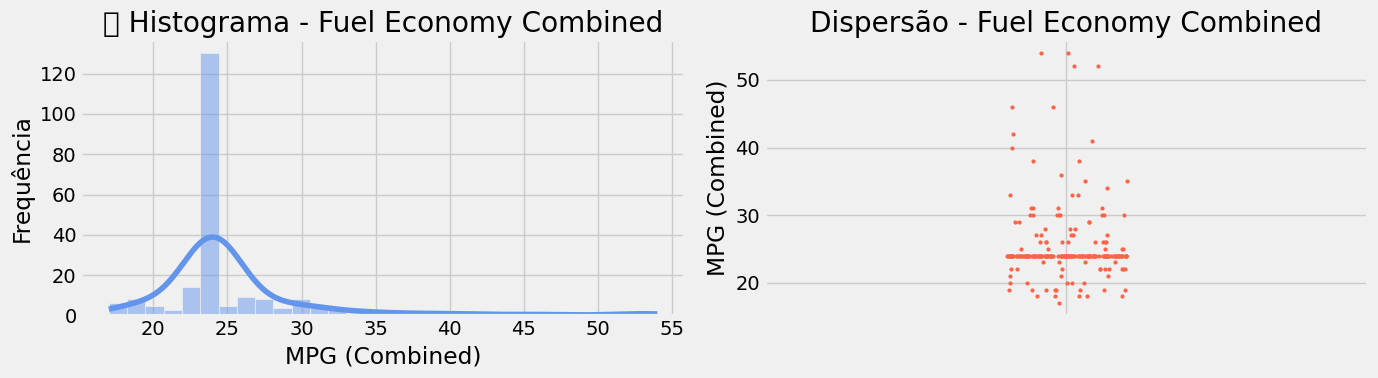

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df_cleaned['Conventional Fuel Economy Combined'], ax=axes[0], bins=30, kde=True, color='cornflowerblue')
axes[0].set_title('📊 Histograma - Fuel Economy Combined')
axes[0].set_xlabel('MPG (Combined)')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)
sns.stripplot(y=df_cleaned['Conventional Fuel Economy Combined'], ax=axes[1], color='tomato', size=3)
axes[1].set_title('Dispersão - Fuel Economy Combined')
axes[1].set_ylabel('MPG (Combined)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

**A análise acima da eficiência de combustível convencional (MPG (milhas por galão) combinado) mostra uma concentração notável dos veículos entre 23 e 26 MPG, com poucos registros acima de 40 MPG.**

**Histograma com KDE (à esquerda):** Mostra forte concentração ao redor de 24 MPG, indicando baixa variabilidade. O pico acentuado sugere que muitos veículos compartilham configurações semelhantes de motorização e eficiência.

**Gráfico de dispersão (à direita):** Mostra uma faixa bem estreita de eficiência para a maioria dos veículos, com alguns poucos outliers acima de 50 MPG, que podem indicar veículos híbridos leves ou mais eficientes.

**Esses dados reforçam que, apesar da evolução tecnológica, a eficiência média dos veículos com combustível convencional ainda é limitada, quando comparada à autonomia elétrica crescente de modelos EVs.**


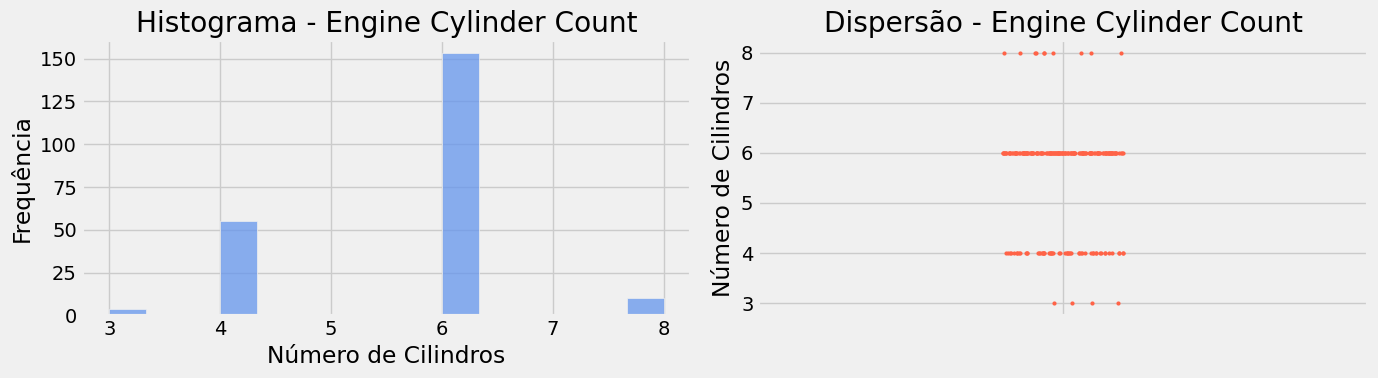

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df_cleaned['Engine Cylinder Count'], ax=axes[0], bins=15, kde=False, color='cornflowerblue')
axes[0].set_title('Histograma - Engine Cylinder Count')
axes[0].set_xlabel('Número de Cilindros')
axes[0].set_ylabel('Frequência')
axes[0].grid(True)
sns.stripplot(y=df_cleaned['Engine Cylinder Count'], ax=axes[1], color='tomato', size=3)
axes[1].set_title('Dispersão - Engine Cylinder Count')
axes[1].set_ylabel('Número de Cilindros')
axes[1].grid(True)
plt.tight_layout()
plt.show()

**A visualização acima apresenta a frequência e dispersão da quantidade de cilindros nos motores dos veículos registrados:**

**Histograma (à esquerda):** A maioria dos veículos possui 6 cilindros, seguido por 4 cilindros. Há alguns registros com 3 ou 8 cilindros, representando configurações menos comuns.

**Gráfico de dispersão (à direita):** Confirma a forte concentração nos valores 4 e 6, com poucos outliers em 3 e 8. Esses padrões são consistentes com o uso de motores convencionais a combustão.

**Motores com menos cilindros (ex: 3 ou 4) tendem a ser mais eficientes e usados em veículos compactos ou híbridos leves.**

**Motores com mais cilindros (ex: 6 ou 8) geralmente entregam mais potência, mas consomem mais, o que impacta negativamente a autonomia e eficiência.**




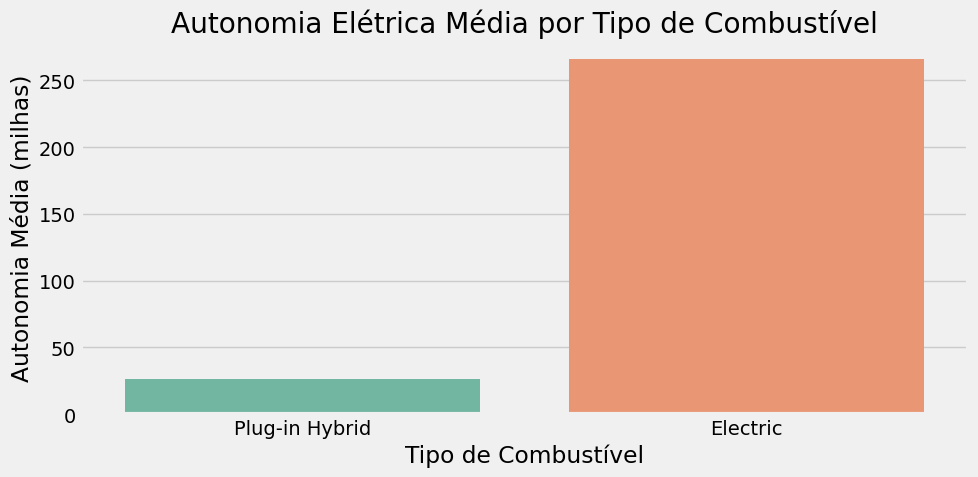

In [53]:
# Média de autonomia por tipo de combustível
media_fuel = df_cleaned.groupby('Fuel Grouped')['All-Electric Range'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=media_fuel.index, y=media_fuel.values, palette='Set2')
plt.title('Autonomia Elétrica Média por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Autonomia Média (milhas)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**O gráfico acima compara a autonomia elétrica média dos veículos conforme o tipo de combustível utilizado:**

**Veículos 100% Elétricos** possuem uma autonomia média significativamente superior, ultrapassando 260 milhas**.

**Veículos Plug-in Hybrid** apresentam média de cerca de 30 milhas, pois o motor elétrico é usado apenas em trechos curtos enquanto o restante do trajeto é complementado pelo motor a combustão.

**A diferença drástica evidencia o avanço das tecnologias de bateria e a proposta distinta de cada categoria:**
  - **Plug-in Hybrids**: foco em economia e flexibilidade.
  - **Elétricos puros**: foco em emissões zero e maior autonomia.

**Esse comparativo deixa claro por que os EVs estão ganhando protagonismo no mercado automotivo global.**

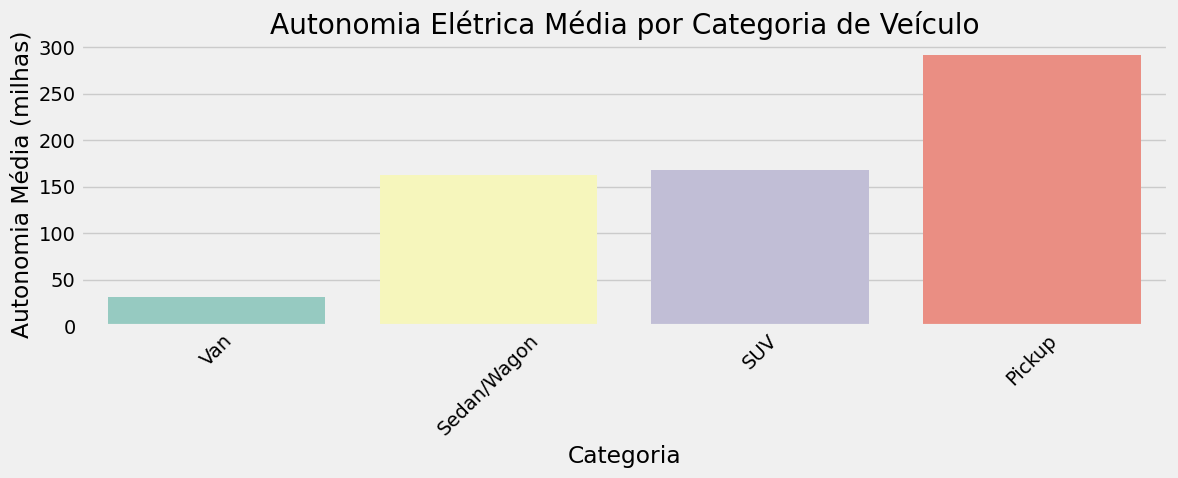

In [54]:
# Média de autonomia por categoria de veículo
media_cat = df_cleaned.groupby('Category')['All-Electric Range'].mean().sort_values()
plt.figure(figsize=(12, 5))
sns.barplot(x=media_cat.index, y=media_cat.values, palette='Set3')
plt.title('Autonomia Elétrica Média por Categoria de Veículo')
plt.xlabel('Categoria')
plt.ylabel('Autonomia Média (milhas)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Acima vemos a média da autonomia elétrica varia significativamente entre as categorias de veículos:**

**Vans** apresentam a menor autonomia, com média inferior a 40 milhas. Isso se deve, em parte, ao uso predominante de versões híbridas plug-in com baterias menores.

**Sedans/Wagons** e **SUVs** possuem médias semelhantes, em torno de 160 a 170 milhas, refletindo um equilíbrio entre peso, aerodinâmica e capacidade da bateria.

**Pickups** surpreendem com a maior média de autonomia, ultrapassando 290 milhas. Isso pode ser atribuído a: Uso de baterias maiores para atender à alta demanda energética desses veículos e  a estratégia de mercado para compensar seu maior consumo e manter competitividade com veículos convencionais.

**Em vista disto percebemos que o tipo de veículo impacta diretamente na escolha do sistema de propulsão elétrica e no tamanho da bateria, afetando a autonomia total.**


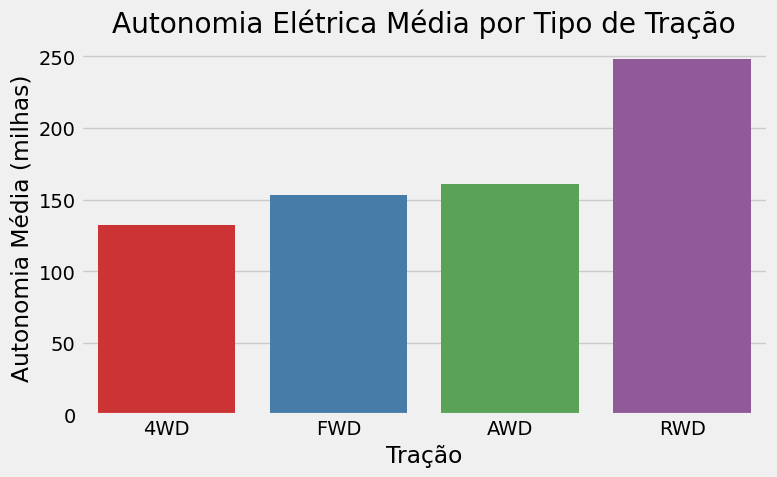

In [55]:
# Média de autonomia por tipo de tração
media_tracao = df_cleaned.groupby('Drivetrain Grouped')['All-Electric Range'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=media_tracao.index, y=media_tracao.values, palette='Set1')
plt.title('Autonomia Elétrica Média por Tipo de Tração')
plt.xlabel('Tração')
plt.ylabel('Autonomia Média (milhas)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Analisando o gráfico acima temos:**

**RWD (tração traseira):**  Tem a maior autonomia média, é o tipo de tração preferencial em elétricos modernos, pois é mais eficiente em linha reta e exige menos tração.

**AWD (tração integral permanente) e 4WD (tração 4x4 com ativação manual):** Tem autonomia parecida, pois veículos com tração integral tendem a ser mais pesados o que impacta no consumo.

**FWD (tração dianteira):** Tem a menor autonomia, podem refletir modelos mais antigos ou compactos com bateria menor.